#Youtube Video Analysis



#Table of Contents

>[1. Objective](#scrollTo=U8Qi99Y5Q6cC&line=1&uniqifier=1)

>[2. Loading the Data](#scrollTo=8evXjHxPQrCV&line=1&uniqifier=1)

>[3. Data Preprocessing](#scrollTo=zmJ50UIjWW8l&line=1&uniqifier=1)

>>[3.1 Fixing DataTypes]()

>>[3.2 Handle Missing Values](#scrollTo=Y20Fe4YPYKp0&line=1&uniqifier=1)

>>[3.3 Add Categories using JSON files](#scrollTo=bAE0AYSZ9GQ_&line=1&uniqifier=1)

>[4. Explainatory Data Analysis](#scrollTo=mB3mJPFxeiV7&line=1&uniqifier=1)

>>[4.1 ##4.1 Ratio of likes-dislikes in different categories](#scrollTo=B-y2q_-Ve8hB&line=1&uniqifier=1)

>>[4.2 Most Viewed Categories](#scrollTo=k-drTZtD9i1O&line=1&uniqifier=1)

>>[4.3 Check correlation between views and likes/dislikes views](#scrollTo=rRIJ-n-TATS3&line=1&uniqifier=1)

>>[4.4 Users like videos from which category more?](#scrollTo=4BA03WuXkQ3f)

>>[4.5 Relation between Views and Likes](#scrollTo=lWxQJicDCUQn&line=1&uniqifier=1)

>>[4.6 How liked categories vary from country to country?](#scrollTo=v1xzX1U3lKjR&line=1&uniqifier=1)

>>[4.7 Lets check whether the most liked videos actually belong to the most liked categories](#scrollTo=PCPWMwgFC1se&line=1&uniqifier=1)

>>[4.8 Time to trend for each category](#scrollTo=YL364m6y-Pab&line=1&uniqifier=1)

>>[4.9 Correlation between likes,dislikes,views, comment_count](#scrollTo=ATi1t8_SE2_d)

#Objective
The notebook is made to practive Explainatory Data Analyis on the youtube video datadset <a src='https://www.kaggle.com/datasets/datasnaek/youtube-new/discussion'>https://www.kaggle.com/datasets/datasnaek/youtube-new/discussion</a>.
<br><br>
The Notebook is mainly inspired by <a src='https://medium.com/@raahimkhan_85173/data-cleaning-and-exploratory-data-analysis-with-pandas-on-trending-you-tube-video-statistics-e06d7cd08710'>https://medium.com/@raahimkhan_85173/data-cleaning-and-exploratory-data-analysis-with-pandas-on-trending-you-tube-video-statistics-e06d7cd08710</a>

In [ ]:
# imports

import numpy as np
# regular expressions
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# color maps
from matplotlib import cm
from datetime import datetime
# file retrieval
import glob
import os
import json
# serialization and deserialization of python objects
import pickle
# compatibility librarry
import six
# default aesthetics
sns.set()
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None) # display all rows
pd.options.mode.chained_assignment = None # done display error at chained methods

# Loading the Data




Upload the kaggle.json file.

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d datasnaek/youtube-new

youtube-new.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import shutil

In [ ]:

# Specify the path to the zip file
zip_path = '/content/youtube-new.zip'

# Specify the destination directory where the contents will be extracted
destination_dir = '/content/youtube/'

# Open the zip file
shutil.unpack_archive(zip_path, destination_dir)

print("Zip file extracted successfully.")


Zip file extracted successfully.


In [ ]:
# get the paths of all csv file in youtube
AllCSV = [i for i in glob.glob('./youtube/*.{}'.format('csv'))]
AllCSV

['./youtube/INvideos.csv',
 './youtube/MXvideos.csv',
 './youtube/KRvideos.csv',
 './youtube/GBvideos.csv',
 './youtube/RUvideos.csv',
 './youtube/JPvideos.csv',
 './youtube/CAvideos.csv',
 './youtube/DEvideos.csv',
 './youtube/USvideos.csv',
 './youtube/FRvideos.csv']

In [ ]:
# get all the countries
countries = []

for i in AllCSV:
  countries.append(i.split("/")[-1][0:2])

In [ ]:
countries

['IN', 'MX', 'KR', 'GB', 'RU', 'JP', 'CA', 'DE', 'US', 'FR']

In [ ]:
# save each csv in a dictionary of dataframes
dataframes = {}
encoding = 'latin-1'

for index,country in enumerate(countries):
  dataframes[country] = pd.read_csv(AllCSV[index], encoding=encoding) 

#Preprocessing The Data

In [ ]:
dataframes['CA'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [ ]:
for c in dataframes.keys():
  df = dataframes[c]
  # convert comments_disabled, ratings_disabled, video_error_or_removed  to category
  df['comments_disabled'] = df['comments_disabled'].astype('category') 
  df['ratings_disabled'] = df['ratings_disabled'].astype('category') 
  df['video_error_or_removed'] = df['video_error_or_removed'].astype('category') 

  # fixing trending date
  # add 20 at the start to convert 17 to 2017, then spplit by '.' to get year, date and month
  trending_dates_pieces = np.array([date.split('.') for date in "20"+df['trending_date']])
  # combine the pieces to make proper date column
  df['year'] = trending_dates_pieces[:, 0]
  df['month'] = trending_dates_pieces[:, 2]
  df['day'] = trending_dates_pieces[:, 1]
  # join the pieces to make new trending_dates
  df['trending_date'] = pd.to_datetime(df[['year','month','day']],format='%Y-%m-%d')
  del df['year']
  del df['month']
  del df['day']

  #  break publish_time into publish date and tie
  # correct the formatting
  df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')
  df.insert(5, "publish_date",  df['publish_time'].dt.date)
  df['publish_time'] = df['publish_time'].dt.time

In [ ]:
dataframes["CA"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40881 non-null  object        
 1   trending_date           40881 non-null  datetime64[ns]
 2   title                   40881 non-null  object        
 3   channel_title           40881 non-null  object        
 4   category_id             40881 non-null  int64         
 5   publish_date            40881 non-null  object        
 6   publish_time            40881 non-null  object        
 7   tags                    40881 non-null  object        
 8   views                   40881 non-null  int64         
 9   likes                   40881 non-null  int64         
 10  dislikes                40881 non-null  int64         
 11  comment_count           40881 non-null  int64         
 12  thumbnail_link          40881 non-null  object

##Handling missing values

In [ ]:
for c in dataframes.keys():
    print(c)
    print(dataframes[c].isna().sum())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print()

IN
video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_date                0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

MX
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_date                 0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled    

In [ ]:
# missing values in description only
# drop description column in each dataframe
for c in dataframes.keys():
  dataframe = dataframes[c]
  dataframe.drop(['description'], axis=1, inplace=True)

In [ ]:
# add country column in each dataframe
for c in dataframes.keys():
  dataframe = dataframes[c]
  dataframe['country'] = c

#concat all dataframes
final = pd.concat([dataframes[c] for c in dataframes.keys()]) 

In [ ]:
final.sample(10)

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,country
12509,ir-_cm0BaWc,2018-01-17,Dingo Meets a Coyote!,Brave Wilderness,15,2018-01-12,12:00:03,"adventure|""adventurous""|""alligator""|""animals""|...",1537237,42323,654,7677,https://i.ytimg.com/vi/ir-_cm0BaWc/default.jpg,False,False,False,US
6454,GCAH7amZhWk,2017-12-16,Was zur HÃ¶lle ist heute passiert...!?,Jay & Arya,22,2017-12-14,19:00:41,"star wars epsiode 8|""star wars die letzten jed...",263121,31246,823,2873,https://i.ytimg.com/vi/GCAH7amZhWk/default.jpg,False,False,False,DE
31782,fBdx0CdSDJw,2018-04-30,Jet Sosyete 10. BÃ¶lÃ¼m Full HD Tek ParÃ§a,BeÅiktaÅ KÃ¼ltÃ¼r Merkezi (BKM),23,2018-04-29,20:15:16,"bkm|""Ã§aÄlar Ã§orumlu""|""Ã§aÄlar Ã§orumlu jet...",52414,519,44,73,https://i.ytimg.com/vi/fBdx0CdSDJw/default.jpg,False,False,False,DE
17159,2rPTvumRkOc,2018-02-09,Evangelio de Hoy Jueves 8 Febrero 2018 No estÃ...,Oraciones en video,22,2018-02-07,23:12:30,"Evangelio del dia|""Oraciones para facebook""|""O...",204140,8955,98,191,https://i.ytimg.com/vi/2rPTvumRkOc/default.jpg,False,False,False,MX
36339,t3QBIJh23vo,2018-05-23,ÐÐ ÐÐÐ ÐÐ Ð ÐÐÐÐ ÐÐÐÐ 3 ÑÐ°ÑÐ°...,Irina Yasinskaya,24,2018-05-22,10:30:01,"ÐÐ¾Ð¼ ÐÑÐ¸Ð·ÑÐ°Ðº|""ÐÐ½Ð¸Ð³Ð° ÐÐµÐ´ÑÐ¼""|...",21119,705,140,331,https://i.ytimg.com/vi/t3QBIJh23vo/default.jpg,False,False,False,RU
34353,NGkQOMxDeq0,2018-05-13,[REPLAY] Revivez l'anniversaire de Wally Seck ...,Dakaractu TV HD,24,2018-05-13,06:54:40,[none],79864,1170,109,38,https://i.ytimg.com/vi/NGkQOMxDeq0/default.jpg,False,False,False,FR
18351,1r-Lbj892KU,2018-02-16,Florida school shooting suspect appears in court,CNN,25,2018-02-15,19:31:46,"latest News|""Happening Now""|""CNN""|""US News""",653147,4384,443,6203,https://i.ytimg.com/vi/1r-Lbj892KU/default.jpg,False,False,False,CA
16789,3KdPBWXHA58,2018-02-14,à° à°¸à°²à± à° à° à°®à±à°®à°¾à°¯à°¿ à°à°µà...,We support you,22,2018-02-13,14:23:44,"priya prakash varrier|""internet sensation""|""pr...",172907,0,0,0,https://i.ytimg.com/vi/3KdPBWXHA58/default.jpg,True,True,False,IN
26504,syubN716KuI,2018-03-28,"OÄuzhan UÄurâla P!NÃ: Beyaz Show, Uber-Ta...",Onedio,24,2018-03-27,19:00:08,"onedio|""onedio video""|""komik videolar""|""eglenc...",586893,55090,1214,3444,https://i.ytimg.com/vi/syubN716KuI/default.jpg,False,False,False,DE
40259,C-7Tn5a7R3Y,2018-06-12,ÐÐ³ÑÐ° Fallout 76 - Ð ÑÑÑÐºÐ¸Ð¹ ÑÑÐµÐ¹Ð...,Ð Ð ÐµÐ¹ÑÐ¸Ð½Ð³Ðµ,1,2018-06-11,05:26:46,"fallout 76 ÑÑÐµÐ¹Ð»ÐµÑ|""fallout 76 ÑÑÑÑ...",81690,2765,98,468,https://i.ytimg.com/vi/C-7Tn5a7R3Y/default.jpg,False,False,False,RU


##3.3 Add Categories using the json files

In [ ]:
# read the 3 json files and see whether they are are same content or not
# read file
with open('/content/youtube/CA_category_id.json', 'r') as f:  # reading one randomly selected json files to make sense of its contents
    canada_json = json.loads(f.read()) 
with open('/content/youtube/FR_category_id.json', 'r') as f:  # reading one randomly selected json files to make sense of its contents
    france_json = json.loads(f.read()) 
with open('/content/youtube/DE_category_id.json', 'r') as f:  # reading one randomly selected json files to make sense of its contents
    germany_json = json.loads(f.read()) 

In [ ]:
canada_items, france_items, germany_items = canada_json['items'], france_json['items'], germany_json['items']
print(len(canada_items), len(france_items),len(germany_items))
l = len(canada_items)

31 31 31


In [ ]:
sorted_canada = sorted(canada_items, key=lambda x: eval(x["id"]))
sorted_france = sorted(france_items, key=lambda x: eval(x["id"]))
sorted_germany = sorted(germany_items, key=lambda x: eval(x["id"]))

In [ ]:
for i in range(l):
  print(f"{sorted_canada[i]['id']}, {sorted_canada[i]['snippet']['title']}")
  print(f"{sorted_france[i]['id']}, {sorted_france[i]['snippet']['title']}")
  print(f"{sorted_germany[i]['id']}, {sorted_germany[i]['snippet']['title']}")


As we can see, all json categories files have the same content, therefore one file is sufficient to decode.

In [ ]:
# create dictionary mapping category id to category
category_dict = {}

for item in sorted_canada:
  category_dict[eval(item['id'])] = item['snippet']['title']

# apply the mapping to the final dataframe
final['category'] = final.category_id.map(category_dict)


# delete the category_id column
del final['category_id']

#4. Explainatory Data Analysis

In [ ]:
# sort the final dataframe using trending date
final = final.sort_values('trending_date', ascending=False)

In [ ]:
# create backup
final_backup = final

In [ ]:
final.sample(10)

,video_id,trending_date,title,channel_title,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,country,category
10220,72hlr-E7KA0,2018-01-04,How Airlines Price Flights,Wendover Productions,2018-01-02,16:30:26,"ticket|""pricing""|""airlines""|""airline""|""flights...",621890,20889,429,1486,https://i.ytimg.com/vi/72hlr-E7KA0/default.jpg,False,False,False,US,Education
2457,vjSMbIEfxgE,2017-11-26,SeÃ±ora Acero 4 - Capitulo 15 Parte 4/5,Sebastian Acero,2017-11-25,04:46:38,[none],161503,749,46,34,https://i.ytimg.com/vi/vjSMbIEfxgE/default.jpg,False,False,False,MX,Entertainment
39109,AkCLxl3MzNA,2018-06-05,Taking A Colour Blind Test With Colour Blind G...,jacksepticeye,2018-05-15,19:00:00,"jacksepticeye|""colour blind""|""colour blind tes...",1473359,54720,1007,9272,https://i.ytimg.com/vi/AkCLxl3MzNA/default.jpg,False,False,False,US,Education
10232,qsp52_OMols,2018-01-14,Koombiyo | Episode 41 - (2018-01-13) | ITN,ITN Sri Lanka,2018-01-13,15:01:47,"itn|""sri lanka""|""independent television networ...",129763,1289,51,230,https://i.ytimg.com/vi/qsp52_OMols/default.jpg,False,False,False,KR,Entertainment
10943,5Tfq0-_tVAg,2018-01-19,ì ìì© [ê°ì íê¹] ìë¦¬íê¸°,ìí,2018-01-17,05:00:01,"ìí|""sof""|""ë¨¹ë°©""|""ì ìì©""|""ê°ìíê¹...",185327,1869,79,597,https://i.ytimg.com/vi/5Tfq0-_tVAg/default.jpg,False,False,False,KR,Entertainment
37577,uBtUuop-9hY,2018-05-29,"ÐÐÐ ÐÐÐÐ£ÐÐÐ! Asos, Celine, Kiini, Re...",Margarita Muradova,2018-05-28,04:00:08,"Ð¼Ð°ÑÐ³Ð°ÑÐ¸ÑÐ° Ð¼ÑÑÐ°Ð´Ð¾Ð²Ð°|""ÑÑÐ¸Ð»Ð...",37729,1754,99,159,https://i.ytimg.com/vi/uBtUuop-9hY/default.jpg,False,False,False,RU,Howto & Style
6292,fCeDGfmDNnc,2017-12-15,"Star Wars 8, The Last Jedi : Origines d'une fr...",Captain Popcorn,2017-12-14,20:20:41,"Star Wars""|""Star Wars 8""|""Les Derniers Jedi""|""...",28103,2058,200,506,https://i.ytimg.com/vi/fCeDGfmDNnc/default.jpg,False,False,False,FR,Entertainment
23062,8YLBVBFvGgM,2018-03-11,Selbe ndom: Sathies gagnera haut la main,Pikini Production,2018-03-10,20:50:30,[none],57928,421,194,429,https://i.ytimg.com/vi/8YLBVBFvGgM/default.jpg,False,False,False,FR,Entertainment
25197,H3w-A2a7RDk,2018-03-22,FAKE NEWS #5: Ð²ÑÐµ ÑÐµÐ¹ÐºÐ¸ Ð¿ÑÐµÐ·Ð¸Ð´Ðµ...,Ð¢ÐµÐ»ÐµÐºÐ°Ð½Ð°Ð» ÐÐ¾Ð¶Ð´Ñ,2018-03-21,10:46:03,"Ð´Ð¾Ð¶Ð´Ñ|""ÑÐµÐ»ÐµÐºÐ°Ð½Ð°Ð» Ð´Ð¾Ð¶Ð´Ñ""|""Ð½...",86093,0,0,728,https://i.ytimg.com/vi/H3w-A2a7RDk/default.jpg,False,True,False,RU,News & Politics
18737,rNYduKIyEvA,2018-02-17,Logic - 1-800-273-8255 (LIVE From The 60th GRA...,LogicVEVO,2018-01-29,19:41:24,"Logic|""Alessia""|""1-800-273-8255""|""khalid""|""gra...",7750710,232847,4510,13269,https://i.ytimg.com/vi/rNYduKIyEvA/default.jpg,False,False,False,GB,Music


##4.1 Ratio of likes-dislikes in different categories

In [ ]:
# group by category
category_sum = final.groupby(['category']).sum()

<ipython-input-26-c027b2e83a3b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_sum = final.groupby(['category']).sum()


In [ ]:
category_sum['ratio'] = category_sum.likes/category_sum.dislikes

Text(0.5, 1.0, 'Percategory controversy ratio')

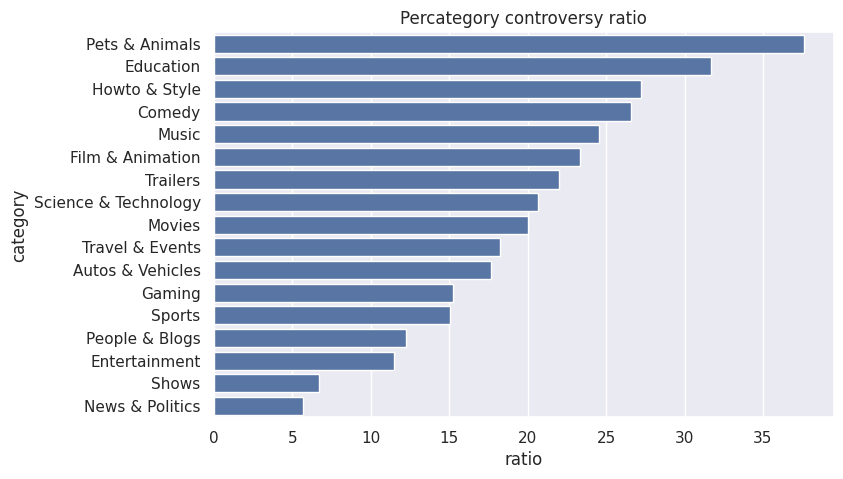

In [ ]:
# create the plot
plt.subplots(figsize=(8, 5))
sns.barplot(x="ratio", y="category", data=category_sum.sort_values(['ratio'], ascending=False).reset_index(),
            label="Likes-Dislikes Ratio", color="b")
plt.title('Percategory controversy ratio')

###Conclusion: 
From this we can see that categories such as animals, education and lifestyle have less conflict between likes and dislikes, on the other hand, categories which are more subjective such as shows, entertainment, news & politics hold lower ratio values.

Least disputed categories: 
1. Pets and Animala
2. Education
3. Howto & Style

Most Displuted categories:
1. Entertainment
2. Shows
3. News & Politics

##4.2 Most Viewed Categories

Text(0.5, 1.0, 'Percategory views')

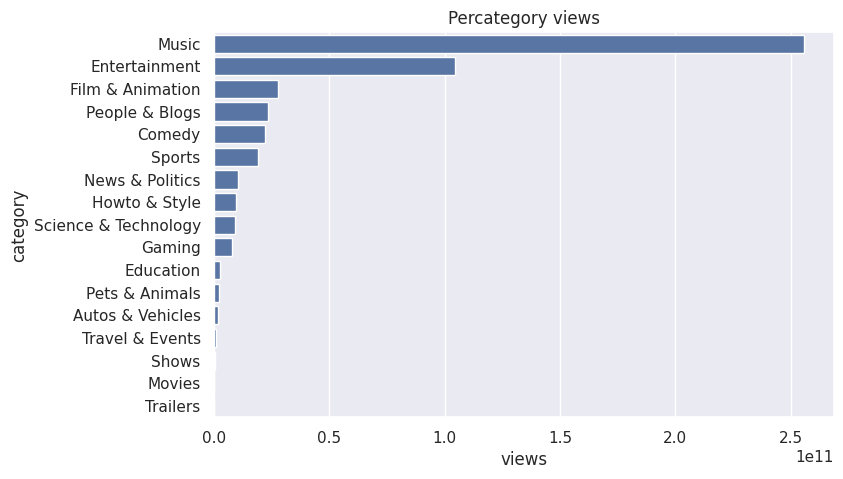

In [ ]:
# create the plot
plt.subplots(figsize=(8, 5))
sns.barplot(x="views", y="category", data=category_sum.sort_values(['views'], ascending=False).reset_index(),
            label="Percategory views", color="b")
plt.title("Percategory views")

###Conclusion:
We can see that MUSIC remains the most viewed, this is because people will often keep the music on replay while multitasking.

Following music, we have entertainment, comedy, people & blogs, film & animation and sports. All these categories have fans which can contribute to repeated views.

Least viewed are Movies and Shows, which is understandable. Due to their long runtimes, it becomes difficult to view them. Addiotionally, movie streaming websites like Netflix, Amazon Prime, etc. have decreased youtube pupularity.

##4.3 Check correlation between views and likes/dislikes views

In [ ]:
# correlation using pandas function
ratio_views_corr = category_sum['ratio'].corr(category_sum['views'])

print(ratio_views_corr)

0.034374624911686295


Text(0.5, 1.0, 'Views vs Ratio')

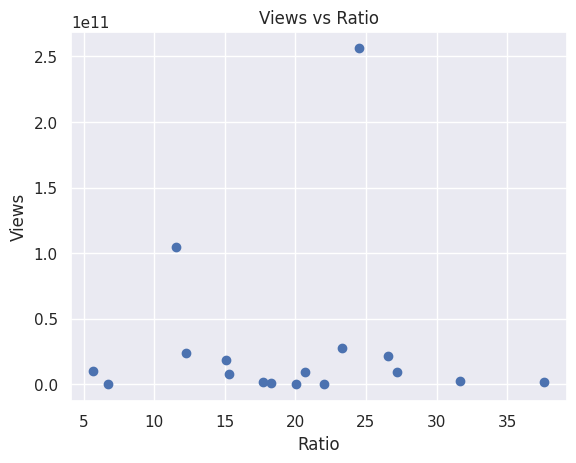

In [ ]:
# plotting correlation
plt.scatter(category_sum['ratio'], category_sum['views'])
plt.xlabel("Ratio")
plt.ylabel("Views")
plt.title("Views vs Ratio")

###Conclusion
From the correletaion value and scatter plot, we can see theres almost no correlation between likes/dislikes and views. Hence, we can Conclude that just because a video is uncontroversial doesnt mean it will be most viewed.

This can be observed from the barchart of "Per Category Views" and "Per Category Controversy ratio"

##4.4 Users like videos from which category more?

<Axes: xlabel='likes', ylabel='category'>

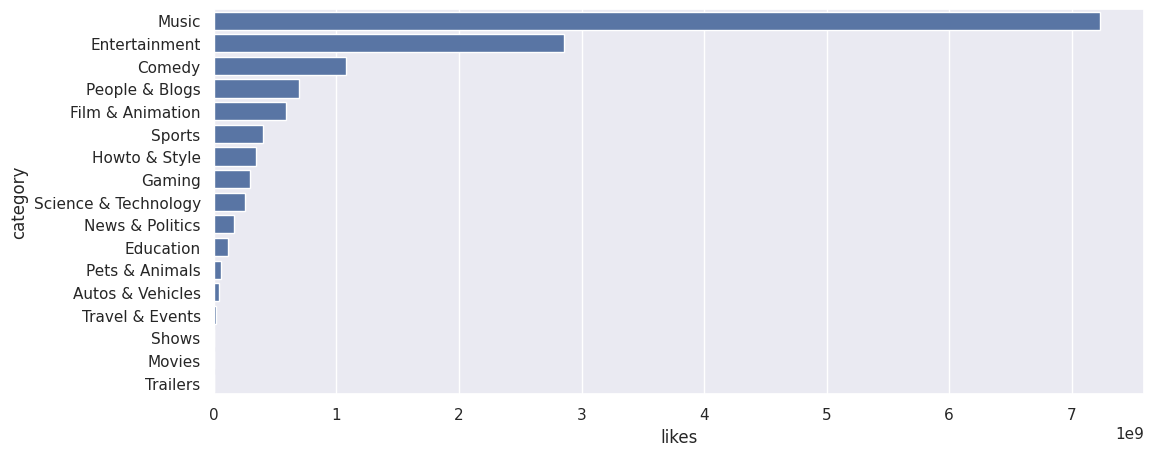

In [ ]:
# plot the ratio

# create the plot
plt.subplots(figsize=(12, 5))
sns.barplot(x="likes", y="category", data=category_sum.sort_values(['likes'], ascending=False).reset_index(),
            label="Which categories are most liked?", color="b")

##4.5 Relation between Views and Likes

In [ ]:
# correlation using pandas function
views_likes_corr = category_sum['views'].corr(category_sum['likes'])

print(views_likes_corr)

0.9970332136839014


###Conclusion: 
We can conclude that most viewed categories are more likely to be liked as well.

##4.6 How liked categories vary from country to country?

In [ ]:
countries_category_sum = final.groupby(['country','category']).sum()

<ipython-input-34-bb3a6b00f646>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  countries_category_sum = final.groupby(['country','category']).sum()


In [ ]:
countries = final.country.unique()

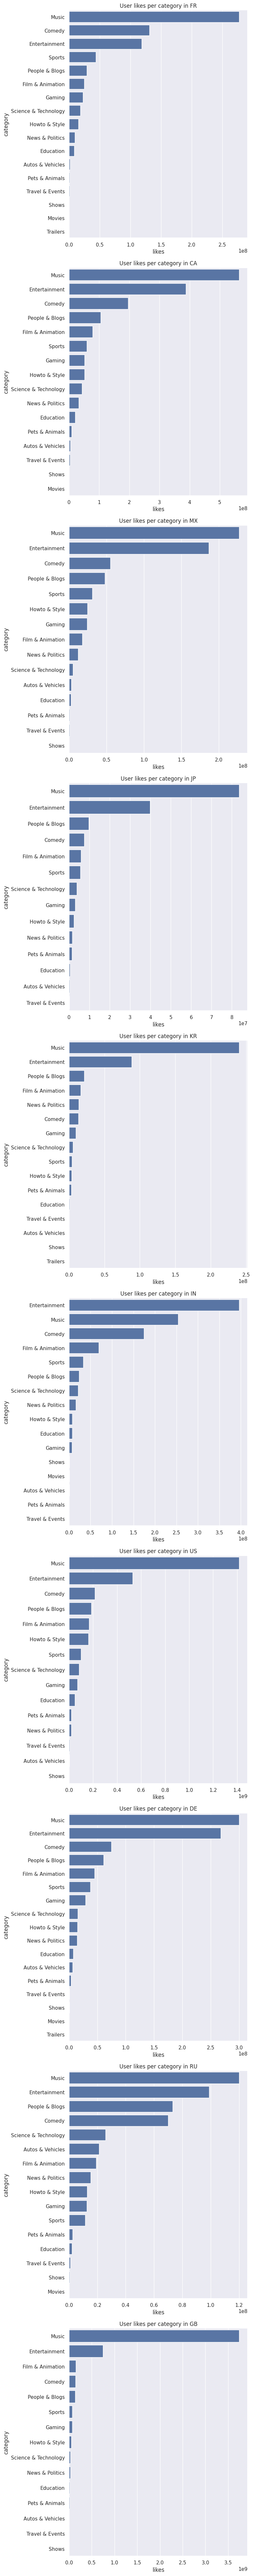

In [ ]:
fig, axes = plt.subplots(nrows=len(countries), ncols=1, figsize=(8, 80))

for index, country in enumerate(countries):
  ax = axes[index]
  sns.barplot(x='likes', y='category', data=countries_category_sum.loc[country].reset_index().sort_values('likes', ascending=False), color='b', ax=ax)
  ax.set_title(f"User likes per category in {country}")

plt.tight_layout()
plt.show()

In [ ]:
# Create an empty DataFrame
country_liked_categories = pd.DataFrame()

# Iterate over countries
for c in countries:
    # Get the numpy array for the current country and sort it
    country_categories = countries_category_sum.loc[c].reset_index().sort_values('likes', ascending=False)['category'].to_numpy()

    # Determine the maximum length among the arrays
    max_length = 18

    # Pad the array with NaN to match the maximum length
    country_categories_padded = np.pad(country_categories, (0, max_length - len(country_categories)), mode='constant', constant_values=np.nan)

    # Add the padded array as a column to the DataFrame
    country_liked_categories[c] = country_categories_padded

# Display the DataFrame
country_liked_categories


,FR,CA,MX,JP,KR,IN,US,DE,RU,GB
0,Music,Music,Music,Music,Music,Entertainment,Music,Music,Music,Music
1,Comedy,Entertainment,Entertainment,Entertainment,Entertainment,Music,Entertainment,Entertainment,Entertainment,Entertainment
2,Entertainment,Comedy,Comedy,People & Blogs,People & Blogs,Comedy,Comedy,Comedy,People & Blogs,Film & Animation
3,Sports,People & Blogs,People & Blogs,Comedy,Film & Animation,Film & Animation,People & Blogs,People & Blogs,Comedy,Comedy
4,People & Blogs,Film & Animation,Sports,Film & Animation,News & Politics,Sports,Film & Animation,Film & Animation,Science & Technology,People & Blogs
5,Film & Animation,Sports,Howto & Style,Sports,Comedy,People & Blogs,Howto & Style,Sports,Autos & Vehicles,Sports
6,Gaming,Gaming,Gaming,Science & Technology,Gaming,Science & Technology,Sports,Gaming,Film & Animation,Gaming
7,Science & Technology,Howto & Style,Film & Animation,Gaming,Science & Technology,News & Politics,Science & Technology,Science & Technology,News & Politics,Howto & Style
8,Howto & Style,Science & Technology,News & Politics,Howto & Style,Sports,Howto & Style,Gaming,Howto & Style,Howto & Style,Science & Technology
9,News & Politics,News & Politics,Science & Technology,News & Politics,Howto & Style,Education,Education,News & Politics,Gaming,News & Politics


##4.7 Lets check whether the most liked videos actually belong to the most liked categories

In [ ]:
country_liked_videos = pd.DataFrame()

for c in countries:
  country_liked_videos[c] = final[final.country==c].sort_values(['views']).iloc[:5]['category'].to_numpy()

In [ ]:
country_liked_videos

,FR,CA,MX,JP,KR,IN,US,DE,RU,GB
0,Entertainment,Entertainment,Sports,Entertainment,People & Blogs,Entertainment,News & Politics,Sports,People & Blogs,News & Politics
1,News & Politics,News & Politics,Entertainment,Entertainment,People & Blogs,Education,News & Politics,Science & Technology,Sports,News & Politics
2,News & Politics,Sports,People & Blogs,Education,Entertainment,Education,News & Politics,People & Blogs,People & Blogs,News & Politics
3,Entertainment,Entertainment,People & Blogs,Education,News & Politics,Education,Sports,People & Blogs,Sports,News & Politics
4,Sports,Education,Entertainment,Comedy,People & Blogs,Entertainment,Sports,Entertainment,News & Politics,News & Politics


###Conclusion:
The most Liked videos do not necessary belong to most liked categories.

##4.8 Time to trend for each category

In [ ]:
# convert publish_date to datetime
final['publish_date'] = pd.to_datetime(final.publish_date)

In [ ]:
# get the time to trend for each video`
final['to_trending'] = (final.trending_date-final.publish_date).dt.days

In [ ]:
# get average to_trending for each category
category_avg_to_trending = final.groupby(['category']).agg({'to_trending':'mean'})

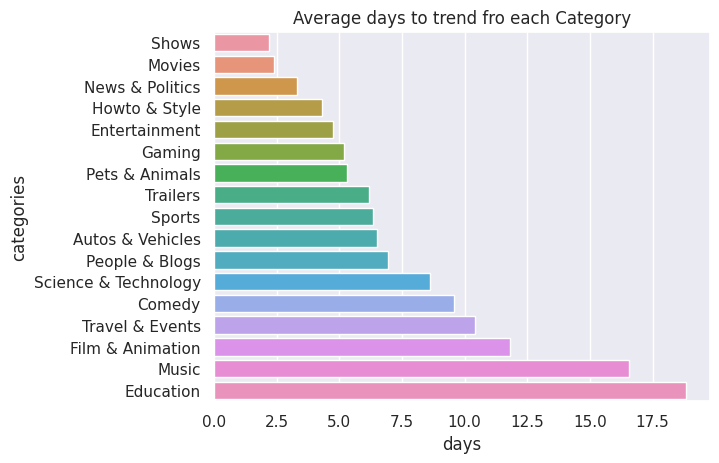

In [ ]:
# plot the barplot
sns.barplot(x='to_trending',y='category',data=category_avg_to_trending.reset_index().sort_values('to_trending'))
plt.xlabel("days")
plt.ylabel("categories")
plt.title("Average days to trend fro each Category")
plt.show()

###Conclusion:
As we can see news & politics trend very fast, because the relevancy of news remains for very small time. Surprisingly, movies and shows also trend very fast, this is probably due to how social media can create hype about a show and due to binge culture as opposed to the "weekly episode" concept.
Music also takes a lot of time to trend. 
Naturally, education will be last because the content will be consumed according to needs of a student. 

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

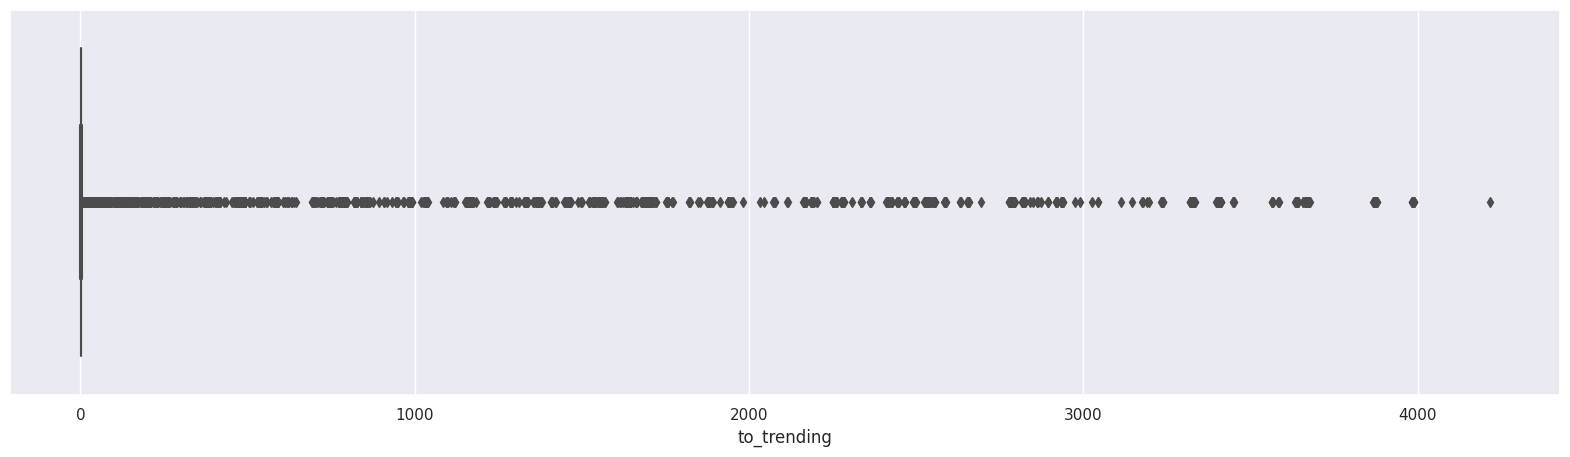

In [ ]:
plt.subplots(figsize=(20, 5))
sns.boxplot(x = 'to_trending', data=final)
plt.title("Box plot of time to trend")

##4.9. Correlation between likes,dislikes,views, comment_count

In [ ]:
col = ['views', 'likes', 'dislikes', 'comment_count']
corr = final[col].corr()
corr

,views,likes,dislikes,comment_count
views,1.000000,0.777796,0.421653,0.510030
likes,0.777796,1.000000,0.453710,0.794490
dislikes,0.421653,0.453710,1.000000,0.705182
comment_count,0.510030,0.794490,0.705182,1.000000


<Axes: >

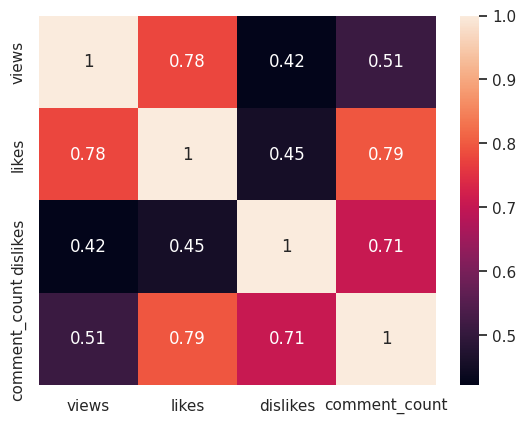

In [ ]:
sns.heatmap(corr, annot=True)

###Conclusion:
We can summarize that liked videos are more likely to be viewed more while both liked and diliked values are likely to be commented more.